In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_excel('cleandata148.xlsx', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50367 entries, 0 to 50366
Data columns (total 56 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   50367 non-null  object 
 1   IDSTUD    50367 non-null  int64  
 2   ASBH02A   41503 non-null  object 
 3   ASBH02B   16269 non-null  object 
 4   ASBH03A   41179 non-null  object 
 5   ASBH04    27142 non-null  float64
 6   ASBH15A   23316 non-null  float64
 7   ASBH15B   20508 non-null  float64
 8   ASBH16    40406 non-null  float64
 9   ASBH17A   15016 non-null  float64
 10  ASBH17B   12722 non-null  float64
 11  ASBH18AA  26072 non-null  float64
 12  ASBH18AB  21042 non-null  float64
 13  ASBG01    37435 non-null  float64
 14  ASBG03    36188 non-null  float64
 15  ASBG10A   36332 non-null  float64
 16  ASBG10B   36097 non-null  float64
 17  ASBG10C   35913 non-null  float64
 18  ASBG10D   35842 non-null  float64
 19  ASBG10E   35864 non-null  float64
 20  ASBG10F   35965 non-null  fl

In [3]:
column_list = df.columns.to_list()
# Join the list into a single string separated by ', '
# Format each column name with quotes
formatted_columns = ', '.join(f"'{col}'" for col in column_list)

# Print the formatted string
print(formatted_columns)

'Country', 'IDSTUD', 'ASBH02A', 'ASBH02B', 'ASBH03A', 'ASBH04', 'ASBH15A', 'ASBH15B', 'ASBH16', 'ASBH17A', 'ASBH17B', 'ASBH18AA', 'ASBH18AB', 'ASBG01', 'ASBG03', 'ASBG10A', 'ASBG10B', 'ASBG10C', 'ASBG10D', 'ASBG10E', 'ASBG10F', 'ASBG11A', 'ASBG11B', 'ASBG11C', 'ASBG11D', 'ASBG11E', 'ASBG11F', 'ASBG11G', 'ASBG11H', 'ASBG11I', 'ASBG11J', 'ASRREA01', 'ASRREA02', 'ASRREA03', 'ASRREA04', 'ASRREA05', 'ASRLIT01', 'ASRLIT02', 'ASRLIT03', 'ASRLIT04', 'ASRLIT05', 'ASRINF01', 'ASRINF02', 'ASRINF03', 'ASRINF04', 'ASRINF05', 'ASRIIE01', 'ASRIIE02', 'ASRIIE03', 'ASRIIE04', 'ASRIIE05', 'ASRRSI01', 'ASRRSI02', 'ASRRSI03', 'ASRRSI04', 'ASRRSI05'


In [4]:
identifier_columns = ['Country', 'IDSTUD']

In [5]:
demographic_info_columns = ['ASBH02A', 'ASBH02B', 'ASBH03A', 'ASBH04', 'ASBH15A', 'ASBH15B', 'ASBH16', 'ASBH17A', 'ASBH17B', 'ASBH18AA', 'ASBH18AB', 'ASBG01', 'ASBG03']

In [6]:
experience_in_school_columns = ['ASBG10A', 'ASBG10B','ASBG10C', 'ASBG10D', 'ASBG10E', 'ASBG10F', 'ASBG11A', 'ASBG11B', 'ASBG11C', 'ASBG11D', 'ASBG11E', 'ASBG11F', 'ASBG11G', 'ASBG11H', 'ASBG11I', 'ASBG11J']

In [7]:
assessment_score_columns = ['ASRREA01', 'ASRREA02', 'ASRREA03', 'ASRREA04', 'ASRREA05', 'ASRLIT01', 'ASRLIT02', 'ASRLIT03', 'ASRLIT04', 'ASRLIT05', 'ASRINF01', 'ASRINF02', 'ASRINF03', 'ASRINF04', 'ASRINF05', 'ASRIIE01', 'ASRIIE02', 'ASRIIE03', 'ASRIIE04', 'ASRIIE05', 'ASRRSI01', 'ASRRSI02', 'ASRRSI03', 'ASRRSI04', 'ASRRSI05']

## I maybe want to get rid of the 9s? As they represent unanswered questions?**

I am interested in understanding the extent of missing data in my data set and where this data is present. I am going to use heatmaps to get a better idea of this.

<AxesSubplot:>

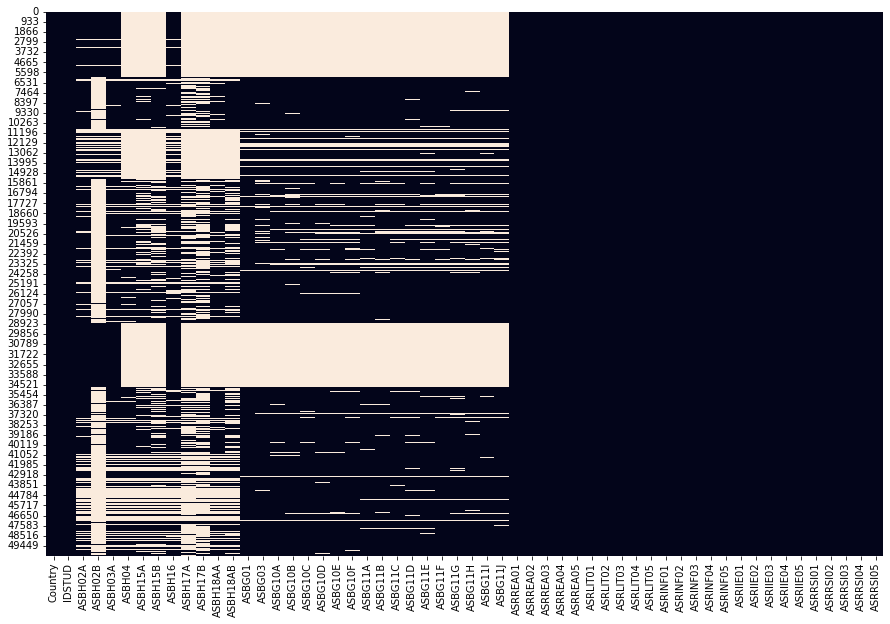

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(),cbar=False)

The above is very hard to read so we want to do this again but grouping by country this time.

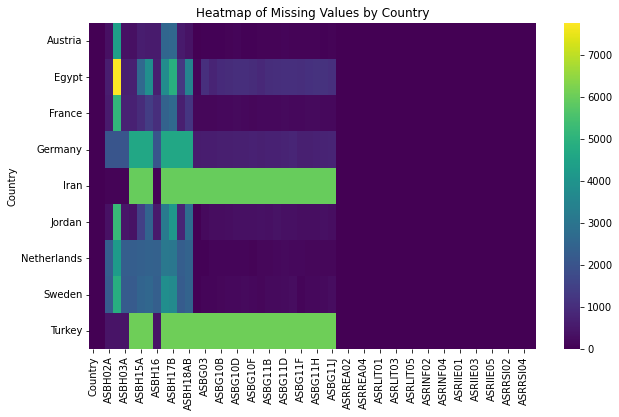

In [9]:
# Perform the Groupby Operation
grouped = df.groupby('Country')

# Aggregate with isnull
missing_values = grouped.apply(lambda x: x.isnull().sum())

# Create the Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(missing_values, annot=False, cmap='viridis', cbar=True)
plt.title('Heatmap of Missing Values by Country')
plt.show()

In [10]:
country_sizes = grouped.size()
print(country_sizes)

Country
Austria        4806
Egypt          7979
France         5339
Germany        4611
Iran           5962
Jordan         6150
Netherlands    4313
Sweden         5175
Turkey         6032
dtype: int64


This is still quite difficult to read so I want to break it down even more and look at missing values for the columns that are not pertaining to assessment as these seem to not contain any missing values.

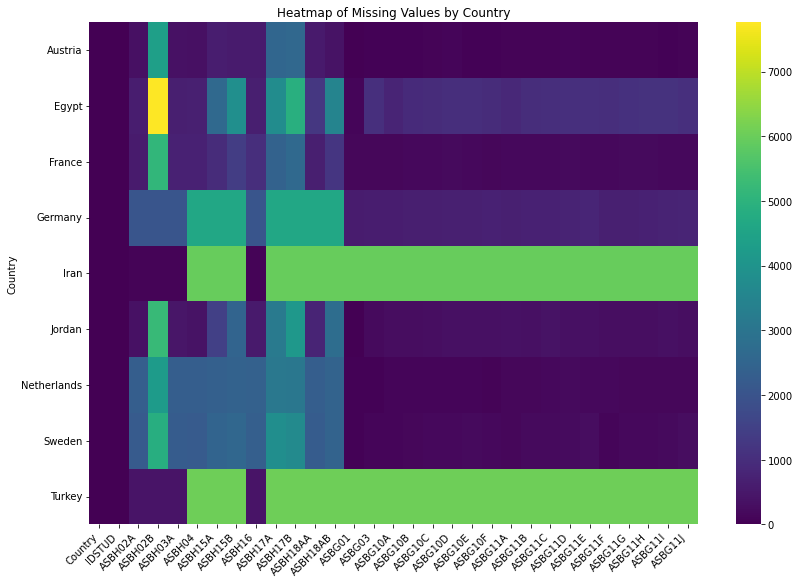

In [13]:
# Select the columns from the DataFrame
non_assessment_columns = identifier_columns + demographic_info_columns + experience_in_school_columns

df_selected = df[non_assessment_columns]

# Perform the Groupby Operation
grouped_selection = df_selected.groupby('Country')

# Aggregate with isnull
missing_values_selection = grouped_selection.apply(lambda x: x.isnull().sum())

# Create the Heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(missing_values_selection, annot=False, cmap='viridis', cbar=True)
# Rotate the column names
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to make room for labels
plt.title('Heatmap of Missing Values by Country')
plt.show()

There is a clear disparancy here between two groups of columns and I want to explore this in more detail. The first group of columns pertains to demographic information and the second group pertains to childrens' experience at school.

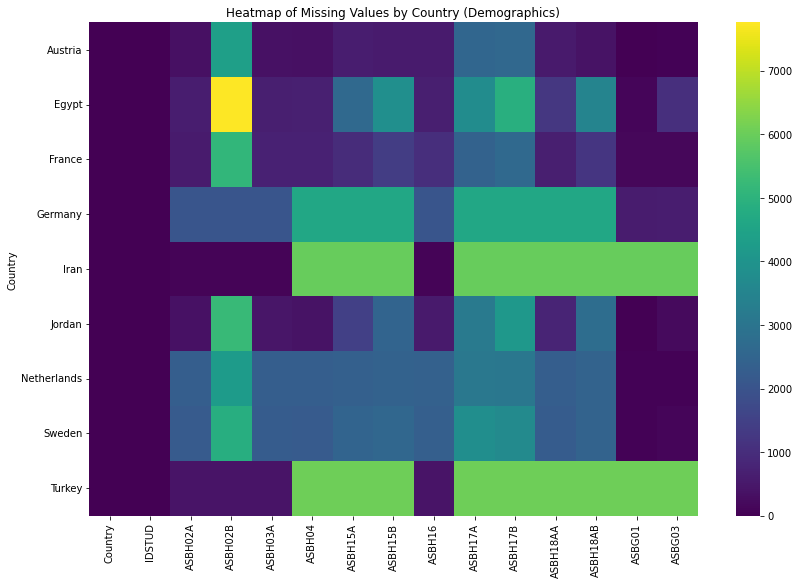

In [14]:
df_demographic = df[identifier_columns + demographic_info_columns]

# Perform the Groupby Operation
grouped_selection_demographic = df_demographic.groupby('Country')

# Aggregate with isnull
missing_values_demographic = grouped_selection_demographic.apply(lambda x: x.isnull().sum())

# Create the Heatmap
plt.figure(figsize=(12, 8))
demographicheatmap = sns.heatmap(missing_values_demographic, annot=False, cmap='viridis', cbar=True)

plt.tight_layout()  # Adjust layout to make room for labels
plt.title('Heatmap of Missing Values by Country (Demographics)')
plt.show()

**Egypt** is missing all of **ASBH02B** which is the age of the child when they came to the country and therefore the minimum age of arrival. It seems that **Turkey** and **Iran** are also missing quite a lot of demographic data pertaining to the level of education of parents and their jobs. Also **ASBG01** and **03** which is the sex and how often the language of the test is spoken at home. 

I want to explore these gaps in the Iran and Turkey data a little more. 

The total number of rows for Egypt is 7979. This is helpful to see how many values are missing across the columns.

In [15]:
missing_values_for_country = missing_values_demographic.loc['Egypt']

print(missing_values_for_country)

Country        0
IDSTUD         0
ASBH02A      625
ASBH02B     7759
ASBH03A      664
ASBH04       689
ASBH15A     2623
ASBH15B     3827
ASBH16       645
ASBH17A     3732
ASBH17B     4908
ASBH18AA    1227
ASBH18AB    3514
ASBG01       114
ASBG03      1053
Name: Egypt, dtype: int64


In [ ]:
# Apply value_counts() to the 'Value' column for each group
value_counts_per_group = grouped['MINAGEARRIVAL'].apply(lambda x: x.value_counts(dropna=False))

print(value_counts_per_group)

In [16]:
# Apply value_counts() to the 'Value' column for each group
value_counts_per_group = grouped['ASBH02A'].apply(lambda x: x.value_counts(dropna=False))

print(value_counts_per_group)

Country         
Austria      Yes    4025
             No      451
             NaN     330
Egypt        Yes    7071
             NaN     625
             No      283
France       Yes    4526
             NaN     571
             No      242
Germany      Yes    2317
             NaN    2038
             No      198
             9        58
Iran         Yes    5720
             No      120
             NaN      70
             9        52
Jordan       Yes    4822
             No      979
             NaN     349
Netherlands  NaN    2287
             Yes    1947
             No       79
Sweden       Yes    2681
             NaN    2186
             No      308
Turkey       Yes    5366
             NaN     408
             No      230
             9        28
Name: ASBH02A, dtype: int64


So, we want to remove the 9s and NaNs from the dataset and then take another look at these heatmaps. 

In [ ]:
df_cleaned = df.dropna(subset= ['ASBH02A'])

In [ ]:
df_cleaned.info()

So we have gone from 50000 rows to 41503 rows. 

In [ ]:
# Drop rows where 'B' column has the value 'apple'
df = df[df['B'] != 'apple']

print("DataFrame after dropping rows where 'B' is 'apple':")
print(df)

In [ ]:
df_cleaned = df_cleaned[df_cleaned['ASBH02A'] != 9]
df_cleaned.info()

In [ ]:
df_cleaned["ASBH02A"].value_counts()

In [ ]:
df_cleaned.to_excel('droppednulls.xlsx')

Within this I want to see if there is a difference for immigrant and non-immigrant children as this is my next variable after country. **SEE CLEANING 3**